<a href="https://colab.research.google.com/github/JongHyunJeong/Machine-Learning/blob/main/Chapter04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> 확률적 경사 하강법

경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 이해

**점진적인 학습**<br>
새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지하는 것<br>
데이터셋의 크기가 너무 커지지 않을 수 있음<br>
앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식을 **점진적 학습** 또는 온라인 학습<br>
대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법**<br>
사이킷런에서도 확률적 경사 하강법을 위한 클래스를 제공

**확률적 경사 하강법**<br>
확률적이란 말은 '무작위하게' 혹은 '랜덤하게'의 기술적인 표현<br>
경사 하강법은 경사를 따라 내려가는 방법<br>
전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는 방법<br>
이처럼 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것을 **확률적 경사 하강법**



확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택해 가파른 경사를 조금 내려감<br>
그 다음 훈련 세트에서 랜덤하게 또 다른 샘플 하나를 선택해 경사를 조금 내려감<br>
이런 식으로 전체 샘플을 모두 사용할 때까지 반복<br>
샘플을 다 사용하고도 산을 내려오지 못했다면 다시 처음부터 시작<br>
훈련세트에 모든 샘플을 다시 채워넣음<br>
이 과정을 만족할만한 위치에 도달할 때까지 계속 내려감<br>
확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **에포크(epoch)**<br>
일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행<br>
여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식을 **미니배치 경사 하강법**<br>
극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방식을 **배치 경사 하강법**<br>

**손실 함수**<br>
어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준(손실 함수 값이 작을수록 좋음)<br>


**SGDClassifier**<br>
fish_csv_data 파일에서 판단스 데이터프레임을 만들어보겠습니다.

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

그다음 Species 열을 제외한 나머지 5개는 입력 데이터로 사용, Species열은 타깃 데이터

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

사이킷런의 train_test_split() 함수를 사용해 이 데이터를 훈련 세트와 테스트 세트로 나눔

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

훈련 세트와 테스트 세트의 특성을 표준화 전처리, 꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야함

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

특성값의 스케일을 맞춘 train_scaled와 test_scaled 두 넘파이 배열을 준비했음<br>
사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier<br>
sklearn.linear_model 패키지 아래에서 임포트해보자

In [ ]:
from sklearn.linear_model import SGDClassifier

SGDClassifier 객체를 만들 때 2개의 매개변수 지정<br>
loss는 손실 함수의 종류를 지정<br>
loss='log'로 지정하여 로지스틱 손실 함수를 지정<br>
max_iter는 수행할 에포크 횟수를 지정<Br>
10으로 지정하여 전체 훈련 세트를 10회 반복, 그 다음 훈련 세트와 테스트 세트에서 정확도 점수를 출력

In [ ]:
sc = SGDClassifier(loss='log', max_iter = 10, random_state =42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


출력된 훈련 세트와 테스트 세트 정확도가 낮은 것을 보아 지정한 반복 횟수 10번이 부족한 것으로 보임<br>
partial_fit() 메서드를 사용하여 모델을 이어서 훈련 가능<br>
fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련 가능

In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


에포크를 한 번 더 실행하니 정확도가 향상됨

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log',random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

300 번의 에포크 동안 훈련을 반복하여 진행<br>
반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가

In [ ]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

300 번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그림

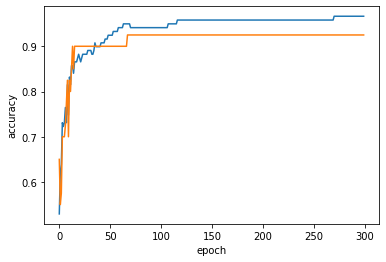

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어짐<br>
에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮음<br>
이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보임<br>

In [ ]:
sc = SGDClassifier(loss='log',max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


SGDClassifier 는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤<br>
tol 매개변수에서는 향상될 최솟값을 지정, 앞의 콛에서 tol 매개변수를 None 으로 지정하여<br>
자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록함

SGDRegressor가 확률적 경사 하강법을 사용한 회귀 알고리즘을 제공(사용 방법은 SGDClassifier와 동일)

SGDClassifier의 loss 매개변수의 기본값은 'hinge'<br>
힌지 손실(hinge loss)은 서포트 벡터 머신(support vercor machine)이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수<br>
힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해보자

In [ ]:
sc = SGDClassifier(loss='hinge',max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
